In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
os.chdir('/content/drive/MyDrive/colab_notebooks')
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /content/drive/MyDrive/colab_notebooks


In [9]:
!pip install ase
import gaussian_new
import numpy as np
import pandas as pd
from cutoffs import Cosine
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
turbs = ["Siemens"] *2
nl=gaussian_new.NeighborlistCalculator(cutoff=1000,ang_cutoff=np.pi/6.)
Gs = {"Siemens": [{"type":"G2", "turbine":"Siemens", "eta":10.,"offset": 2.},{"type":"G4", "elements":"Siemens","eta":5., "gamma":1., "zeta":1.0}]}
symbol="Siemens"
dataset_fp=np.empty(shape=(0, 2))
dataset_pri=np.empty(shape=(0, 1))

     |████████████████████████████████| 2.2 MB 8.3 MB/s 


In [10]:
for distance in range(3,8,1):
  for angle in range(270,301,1):
      df=pd.read_csv('turbine_files/turbine_%sp00_10p00_report_%sD.csv' %(angle,distance), sep=' ', header=None)
      df=df.tail(1)
      df=pd.melt(df)
      df=df.dropna()
      a=df.to_numpy(dtype=np.float)
      a=a[:,1]
      pri=np.array([[a[22]],[a[19]]])
      position=np.array([[0., 0.], [((93.0*distance)*np.cos(np.deg2rad(270-angle))),((93.0*distance)*np.sin(np.deg2rad(270-angle)))]])
      #print("At angle: ", angle, pri,position[1])
      neigh=nl.calculate(turbs,position)
      finpr=gaussian_new.FingerprintCalculator(cutoff=1000,Gs=Gs)
      fp=finpr.calculate(turbs,position,neigh,symbol)
      fp=np.array(fp)
      #pri=(pri,fp)
      #pri=np.concatenate((pri,fp), axis=None)
      dataset_fp=np.append(dataset_fp,fp,axis=0)
      dataset_pri=np.append(dataset_pri,pri,axis=0)
dataset=np.concatenate((dataset_fp, dataset_pri),axis=1)
dataset

{'cutoff': 1000, 'ang_cutoff': 0.5235987755982988}
2
[0.0, 0.0]
2
[0.3806642208388654, 0.0]
{'cutoff': 1000, 'ang_cutoff': 0.5235987755982988}
2
[0.0, 0.0]
2
[0.3806642208388654, 8.461668419715319e-05]
{'cutoff': 1000, 'ang_cutoff': 0.5235987755982988}
2
[0.0, 0.0]
2
[0.3806642208388653, 0.0003384409617272642]
{'cutoff': 1000, 'ang_cutoff': 0.5235987755982988}
2
[0.0, 0.0]
2
[0.3806642208388654, 0.0007613955152562017]
{'cutoff': 1000, 'ang_cutoff': 0.5235987755982988}
2
[0.0, 0.0]
2
[0.3806642208388654, 0.0013533515087298166]
{'cutoff': 1000, 'ang_cutoff': 0.5235987755982988}
2
[0.0, 0.0]
2
[0.3806642208388654, 0.0021141286266182086]
{'cutoff': 1000, 'ang_cutoff': 0.5235987755982988}
2
[0.0, 0.0]
2
[0.3806642208388654, 0.0030434951288414408]
{'cutoff': 1000, 'ang_cutoff': 0.5235987755982988}
2
[0.0, 0.0]
2
[0.3806642208388654, 0.004141167921359738]
{'cutoff': 1000, 'ang_cutoff': 0.5235987755982988}
2
[0.0, 0.0]
2
[0.3806642208388654, 0.005406812642407324]
{'cutoff': 1000, 'ang_cutoff':

array([[0.00000000e+00, 0.00000000e+00, 7.33478260e+00],
       [3.80664221e-01, 0.00000000e+00, 4.85890722e+00],
       [0.00000000e+00, 0.00000000e+00, 7.32779980e+00],
       [3.80664221e-01, 8.46166842e-05, 4.87785816e+00],
       [0.00000000e+00, 0.00000000e+00, 7.34435558e+00],
       [3.80664221e-01, 3.38440962e-04, 4.93991089e+00],
       [0.00000000e+00, 0.00000000e+00, 7.35892916e+00],
       [3.80664221e-01, 7.61395515e-04, 5.00555325e+00],
       [0.00000000e+00, 0.00000000e+00, 7.34891510e+00],
       [3.80664221e-01, 1.35335151e-03, 5.11036873e+00],
       [0.00000000e+00, 0.00000000e+00, 7.34092999e+00],
       [3.80664221e-01, 2.11412863e-03, 5.23679447e+00],
       [0.00000000e+00, 0.00000000e+00, 7.35419559e+00],
       [3.80664221e-01, 3.04349513e-03, 5.40532064e+00],
       [0.00000000e+00, 0.00000000e+00, 7.35912228e+00],
       [3.80664221e-01, 4.14116792e-03, 5.55358648e+00],
       [0.00000000e+00, 0.00000000e+00, 7.35363770e+00],
       [3.80664221e-01, 5.40681

In [64]:
dataset = pd.DataFrame(dataset, columns = ['Fingerprint(G2)','Fingerprint(G4)','Ref_Wind_Speed'])
dataset[251:]

,Fingerprint(G2),Fingerprint(G4),Ref_Wind_Speed
251,0.004024,0.000005,5.758530
252,0.000000,0.000000,7.395049
253,0.004024,0.000020,5.906080
254,0.000000,0.000000,7.395535
255,0.004024,0.000045,6.083628
256,0.000000,0.000000,7.400007
257,0.004024,0.000079,6.295539
258,0.000000,0.000000,7.412040
259,0.004024,0.000124,6.485539
260,0.000000,0.000000,7.416273


In [12]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [13]:
train_dataset

,Fingerprint(G2),Fingerprint(G4),Ref_Wind_Speed
300,0.000000,0.000000,7.524321
145,0.065042,0.002859,6.926014
302,0.000000,0.000000,7.533778
222,0.000000,0.000000,7.480540
52,0.000000,0.000000,7.483937
...,...,...,...
196,0.000000,0.000000,7.407039
6,0.000000,0.000000,7.358929
68,0.000000,0.000000,7.364454
203,0.018603,0.000840,6.856318


In [14]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Ref_Wind_Speed')
test_labels = test_features.pop('Ref_Wind_Speed')

In [15]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Fingerprint(G2),0.061605,0.116692
Fingerprint(G4),0.004671,0.011148
Ref_Wind_Speed,7.153352,0.659626


In [16]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[0.06160538 0.00467145]]


In [17]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[0. 0.]]

Normalized: [[-0.53 -0.42]]


In [18]:
G4 = np.array(train_features['Fingerprint(G4)'])
#G4=np.asarray(G4)

G4_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
G4_normalizer.adapt(G4)

In [19]:
G4_model = tf.keras.Sequential([
    G4_normalizer,
    layers.Dense(units=1)
])

G4_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [20]:
G4_model.predict(G4[:10])

array([[ 0.46342158],
       [ 0.17975451],
       [ 0.46342158],
       [ 0.46342158],
       [ 0.46342158],
       [ 0.3531109 ],
       [ 0.46342158],
       [-1.0208982 ],
       [ 0.45820612],
       [-0.6100244 ]], dtype=float32)

In [21]:
G4_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [22]:
%%time
history = G4_model.fit(
    train_features['Fingerprint(G4)'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 2.58 s, sys: 142 ms, total: 2.72 s
Wall time: 2.64 s


In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.373290,0.262736,95
96,0.375126,0.262927,96
97,0.369782,0.262159,97
98,0.369925,0.263942,98
99,0.366063,0.258005,99


In [24]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [ref_wind_speed]')
  plt.legend()
  plt.grid(True)

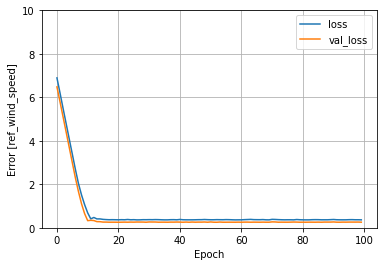

In [25]:
plot_loss(history)

In [26]:
test_results = {}

test_results['G4_model'] = G4_model.evaluate(
    test_features['Fingerprint(G4)'],
    test_labels, verbose=0)

In [27]:
x = tf.linspace(0.0, 0.05, 250)
y = G4_model.predict(x)

In [28]:
def plot_G4(x, y):
  plt.scatter(train_features['Fingerprint(G4)'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('G4')
  plt.ylabel('Ref_wind_speed')
  plt.legend()

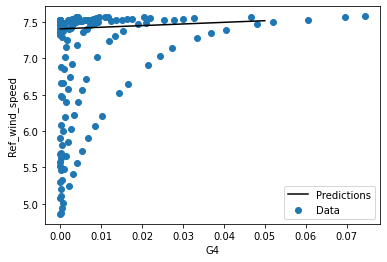

In [29]:
plot_G4(x,y)

In [30]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [31]:
linear_model.predict(train_features[:10])

array([[-0.21312568],
       [ 0.04581288],
       [-0.21312568],
       [-0.21312568],
       [-0.21312568],
       [-0.21240877],
       [-0.21312568],
       [-0.15227759],
       [-0.12654026],
       [-0.30278295]], dtype=float32)

In [32]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.5474167],
       [-0.182096 ]], dtype=float32)>

In [33]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [34]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 2.63 s, sys: 145 ms, total: 2.77 s
Wall time: 2.5 s


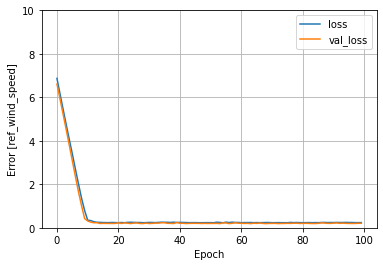

In [35]:
plot_loss(history)

In [36]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [37]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [38]:
dnn_G4_model = build_and_compile_model(G4_normalizer)

In [39]:
dnn_G4_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [40]:
%%time
history = dnn_G4_model.fit(
    train_features['Fingerprint(G4)'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2.88 s, sys: 152 ms, total: 3.04 s
Wall time: 2.72 s


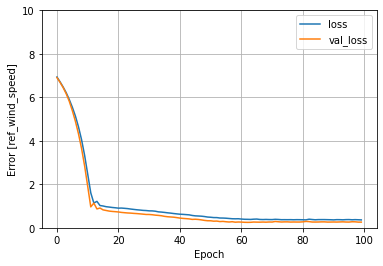

In [41]:
plot_loss(history)

In [42]:
x = tf.linspace(0.0, 0.05, 250)
y = dnn_G4_model.predict(x)

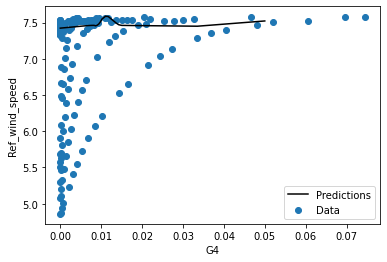

In [43]:
plot_G4(x, y)

In [44]:
test_results['dnn_G4_model'] = dnn_G4_model.evaluate(
    test_features['Fingerprint(G4)'], test_labels,
    verbose=0)

In [45]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 2)                 5         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,422
Trainable params: 4,417
Non-trainable params: 5
_________________________________________________________________


In [46]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=150)

CPU times: user 4.3 s, sys: 240 ms, total: 4.54 s
Wall time: 4.08 s


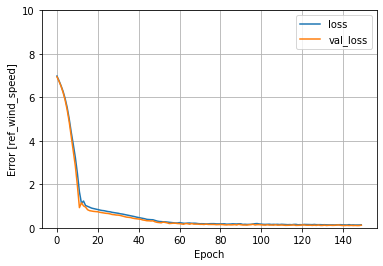

In [47]:
plot_loss(history)

In [48]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [49]:
pd.DataFrame(test_results, index=['Mean absolute error [Ref_wind_speed]']).T

,Mean absolute error [Ref_wind_speed]
G4_model,0.286192
linear_model,0.284019
dnn_G4_model,0.291808
dnn_model,0.207486


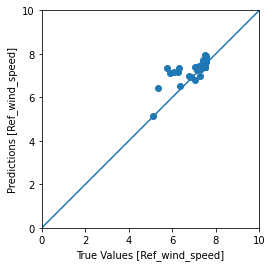

In [50]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Ref_wind_speed]')
plt.ylabel('Predictions [Ref_wind_speed]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

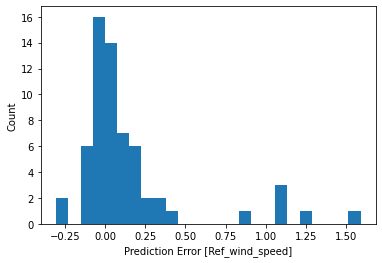

In [51]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Ref_wind_speed]')
_ = plt.ylabel('Count')

In [52]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [54]:
print(error>1)

9      False
25     False
28     False
31     False
32     False
       ...  
285    False
287    False
292    False
296    False
298    False
Name: Ref_Wind_Speed, Length: 62, dtype: bool


In [58]:
np.array(error)

array([ 0.01727104,  0.14778137,  0.02147054,  0.20072984,  0.00878954,
       -0.01295138,  0.24030447, -0.02627659,  0.289464  ,  0.43317461,
        0.33021164,  0.03976869,  0.04394865,  0.01744175,  0.06696081,
        0.01196289,  0.14797831,  0.14218664,  0.12058115,  0.14752531,
        0.16535377,  0.16788626,  0.18244886,  1.08004379,  0.0295949 ,
        0.01632499,  0.01125049, -0.2532816 , -0.30546666, -0.12776375,
       -0.04682207, -0.07592916, -0.07567597, -0.09214068,  0.06320715,
        0.13151884,  0.16300011,  0.01925897,  1.2500658 ,  1.07076549,
        0.88739538,  0.00722074, -0.02650071, -0.11006451,  0.13232374,
       -0.10563183,  1.59144163,  1.06149244,  0.32846689, -0.01638699,
        0.20691967, -0.04584313, -0.04487896, -0.02611971, -0.05194664,
       -0.07523251, -0.03166867, -0.0282011 , -0.02491379, -0.07511091,
       -0.09754277, -0.09426117])

In [59]:
error[error>1]

127    1.080044
193    1.250066
195    1.070765
251    1.591442
257    1.061492
Name: Ref_Wind_Speed, dtype: float64